## Feature Engineering


In the data set pH is the only variable I can use for feature engineering. By transforming pH will see if the model improves. 

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation, metrics, feature_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [5]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [6]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## Feature Engineering - transforming pH

In [7]:
df[ ['pH_log'] ] = df[ ['pH'] ].apply(np.log10)

In [8]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,...,density,pH,sulphates,alcohol,quality,pH_log
0,7.4,0.700,0.00,1.9,0.076,11.0,...,0.99780,3.51,0.56,9.4,5,0.545307
1,7.8,0.880,0.00,2.6,0.098,25.0,...,0.99680,3.20,0.68,9.8,5,0.505150
2,7.8,0.760,0.04,2.3,0.092,15.0,...,0.99700,3.26,0.65,9.8,5,0.513218
3,11.2,0.280,0.56,1.9,0.075,17.0,...,0.99800,3.16,0.58,9.8,6,0.499687
4,7.4,0.700,0.00,1.9,0.076,11.0,...,0.99780,3.51,0.56,9.4,5,0.545307
5,7.4,0.660,0.00,1.8,0.075,13.0,...,0.99780,3.51,0.56,9.4,5,0.545307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,...,0.99651,3.42,0.82,9.5,6,0.534026
1594,6.2,0.600,0.08,2.0,0.090,32.0,...,0.99490,3.45,0.58,10.5,5,0.537819
1595,5.9,0.550,0.10,2.2,0.062,39.0,...,0.99512,3.52,0.76,11.2,6,0.546543


In [9]:
df.drop(['pH'], axis = 1, inplace = True)

In [10]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,quality,pH_log
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0.545307
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,5,0.505150
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,5,0.513218
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,6,0.499687
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,5,0.545307
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,0.56,9.4,5,0.545307
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,6,0.534026
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,5,0.537819
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,6,0.546543


## New EDA

Boxplot to look for outliers, range of data, median

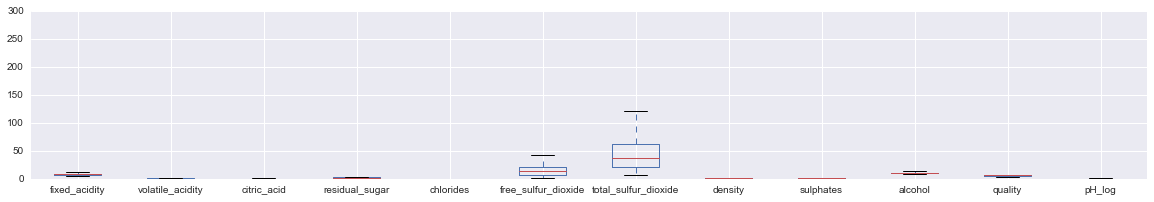

In [11]:
df.plot(kind = 'box', figsize = (20, 3), grid= True )

/Users/general_assembly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11b91dbd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11b92ca10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b938d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11b9386d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11b91ddd0>,
  <matplotlib.lines.Line2D at 0x11b91d8d0>]}

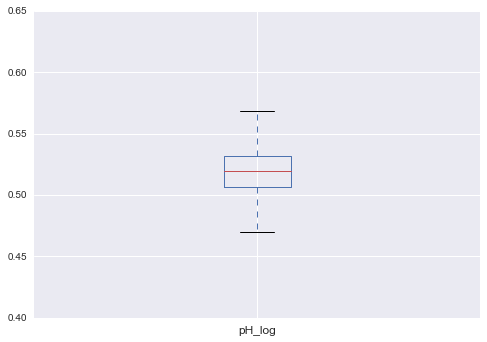

In [12]:
df.boxplot(column= 'pH_log', grid=True)

In [20]:
df.var()

fixed_acidity              3.031416
volatile_acidity           0.032062
citric_acid                0.037947
residual_sugar             1.987897
chlorides                  0.002215
free_sulfur_dioxide      109.414884
total_sulfur_dioxide    1082.102373
density                    0.000004
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
pH_log                     0.000409
dtype: float64

QQplot to see if variable are normally distributed and if they need correction

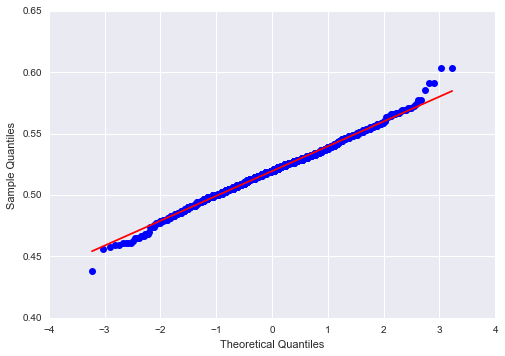

In [22]:
sm.qqplot(df.pH_log, line = 's')

pass

         Splitting data into training and test sets

In [23]:
X = df.drop('quality', axis= 1)

In [24]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,pH_log
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,0.545307
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,0.505150
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,0.513218
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,0.499687
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,0.545307
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,0.56,9.4,0.545307
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,0.534026
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,0.537819
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,0.546543


In [25]:
y = df.quality

In [26]:
y

0       5
1       5
2       5
3       6
4       5
5       5
       ..
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [28]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

959
640
959
640


In [29]:
X_train.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'sulphates', u'alcohol',
       u'pH_log'],
      dtype='object')

In [30]:
print(X_train.shape, y_train.shape)

((959, 11), (959,))


Running Mulitple Linear Regression using statsmodel


In [31]:
X_train_constant = sm.add_constant(X_train)
X_train_model = sm.OLS(y_train, X_train_constant).fit()

X_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     55.03
Date:                Mon, 14 Nov 2016   Prob (F-statistic):           7.29e-94
Time:                        10:31:34   Log-Likelihood:                -943.31
No. Observations:                 959   AIC:                             1911.
Df Residuals:                     947   BIC:                             1969.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   15.7130     27.005      0.582      0.561       -37.283    68.709
fixed_acidity           -0.0106      0.034     -0.314      0.754        -0.077     0.055
volatile_acidity        -1.1899      0.152     -7.840      0.000        -1.488    -0.892
citric_acid              0.0196      0.193      0.102      0.919        -0.359     0.399
residual_sugar           0.0299      0.018      1.635      0.102        -0.006     0.066
chlorides               -2.3172      0.501     -4.623      0.000        -3.301    -1.334
free_sulfur_dioxide  -5.918e-06      0.003     -0.002      0.998        -0.005     0.005
total_sulfur_dioxide    -0.0030      0.001     -3.332      0.001        -0.005    -0.001
density                -10.6051     27.662     -0.383      0.702       -64.891    43.681
sulphates                0.9039      0.143      6.333      0.000         0.624     1.184
alcohol                  0.2764      0.034      8.231      0.000         0.210     0.342
pH_log                  -3.7723      1.902     -1.983      0.048        -7.505    -0.039
==============================================================================
Omnibus:                       10.564   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.525
Skew:                          -0.163   Prob(JB):                      0.00191
Kurtosis:                       3.455   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Transforming pH has not improved the model. 

Using Sklearn to predict the quality using only the variables that are statisticaly significant

In [32]:
# these are the coefficients of regression line 
X_train = df[ [ 'volatile_acidity', 'chlorides','total_sulfur_dioxide', 'ph_log', 'sulphates', 'alcohol'] ]
y_train = df.quality

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print model.intercept_
print model.coef_

3.00489197488
[-1.14190243 -1.70478708 -0.00230956  0.91483197  0.27709787]


In [33]:
# Variable and p value
zip(X_train.columns.values, feature_selection.f_regression(X_train, y_train)[1])

[('volatile_acidity', 2.0517148070142153e-59),
 ('chlorides', 2.3133826540590474e-07),
 ('total_sulfur_dioxide', 8.6217034236582139e-14),
 ('sulphates', 1.8020884534526884e-24),
 ('alcohol', 2.8314769792405462e-91)]

Coefficients that are significant > 5% (95% CI)
Volatile_acidity, Chlorides, Total_Sulfur_Dioxide, Sulphates, and Alcohol 

In [34]:
# Model R2 =  is the coefficient of determination and it usually reflects how well the model fits the observed data. 
model.score(X_train, y_train)

0.3514942385016816

## Summary

Model_1 = it captures 36% of the variability in quality using Sklearn and 39% with Stats model

Model_2 (log pH) =  variability in quality using Sklearn drop 1% (35%), same value for Stats model (39%)

Model R2 | Stastsmode |Sklearn 
---|---|---|---|---
`Model 1 -Multiple Linear Regression `|39%|36%
`Model 2 - log pH`|39%|35%